## Fitting a Linear Regression Model In UsedCar dataset

In [41]:
#import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#import dataset
df_car=pd.read_csv("UsedCar.csv")
df_car

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [3]:
#to print first 5 rows
df_car.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [4]:
# to print last 5 rows
df_car.tail()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75
1552,1552,2018 Maruti Swift Dzire VXI,May-18,Comprehensive,Petrol,5,34756,First Owner,Manual,2018,20.85,1197.0,1197.0,8314.0,6.10


In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [6]:
#check for null values
df_car.isna().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [7]:
#evaluatualing null data
df_car[df_car[['mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)']].isna().any(axis=1)]

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
462,462,2022 BMW X3 xDrive30i M Sport,Feb-22,Zero Dep,Petrol,5,8450,First Owner,Automatic,2022,19.0,5.0,5.0,NaN,71.90
513,513,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
533,533,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
589,589,2011 Toyota Etios G,Jul-11,Comprehensive,Petrol,5,54214,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.55


In [8]:
#dropping null values
df_car.dropna(inplace=True)

In [9]:
df_car.isna().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [10]:
df_car.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

## Dropping Unnecessary Columns

In [11]:
df_car.drop(['Unnamed: 0','registration_year','car_name'],axis=1,inplace=True)

In [12]:
df_car

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


## Checking for duplicate values

In [13]:
df_car.duplicated().sum()

420

## Removing duplicates

In [14]:
df_car=df_car.drop_duplicates()
df_car.duplicated().sum()

0

## Exploratary Data Analysis

In [15]:
##EDA
df_car.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1129.000000,1129.000000,1129.000000,1.129000e+03,1.129000e+03,1.129000e+03,1129.000000
mean,64.533215,53175.497786,221.419362,1.154669e+10,1.154669e+10,1.443523e+04,159.872019
std,1993.857832,43141.973771,557.662692,1.937050e+11,1.937050e+11,9.555439e+04,3509.950855
min,4.000000,620.000000,7.810000,1.700000e+01,1.700000e+01,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.550000,1.197000e+03,1.197000e+03,4.300000e+02,4.500000
50%,5.000000,49000.000000,18.900000,1.461000e+03,1.461000e+03,1.176000e+03,6.750000
75%,5.000000,70000.000000,22.350000,1.991000e+03,1.991000e+03,8.850000e+03,14.900000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


## Statistical summary of Categorical features

In [16]:
df_car.describe(include='object')

,insurance_validity,fuel_type,ownsership,transmission,manufacturing_year
count,1129,1129,1129,1129,1129
unique,6,4,22,13,19
top,Comprehensive,Petrol,First Owner,Manual,2018
freq,787,748,918,644,172


## Data Visualization

<Axes: xlabel='insurance_validity'>

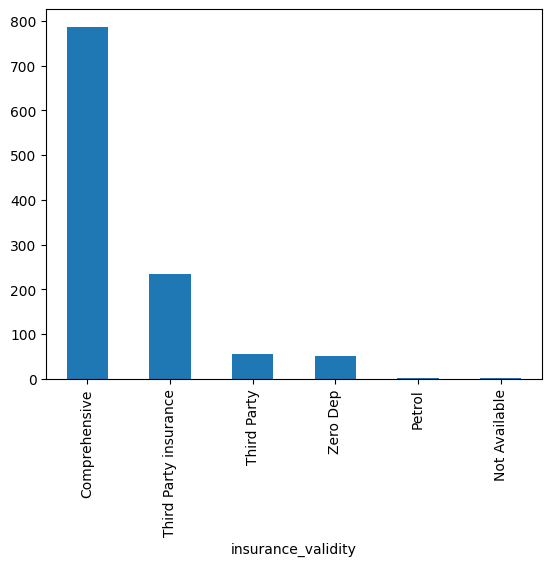

In [17]:
df_car.insurance_validity.value_counts().plot(kind='bar')

## observations:
1)There are some wrong entries in insurance_validity column.

In [18]:
df_car = df_car[df_car['insurance_validity'].isin(['Comprehensive', 'Third Party insurance', 'Third Party'])]

<Axes: xlabel='insurance_validity'>

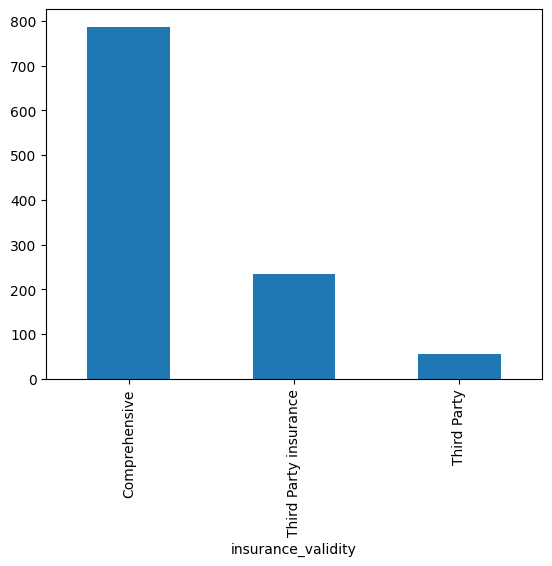

In [19]:
df_car.insurance_validity.value_counts().plot(kind='bar')

In [20]:
df_car.shape

(1076, 12)

<Axes: xlabel='fuel_type'>

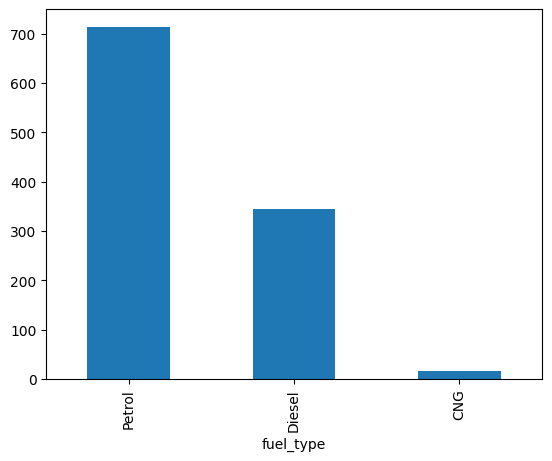

In [21]:
df_car.fuel_type.value_counts().plot(kind='bar')

## observations:
Most of the used cars are petrol cars

<Axes: xlabel='ownsership'>

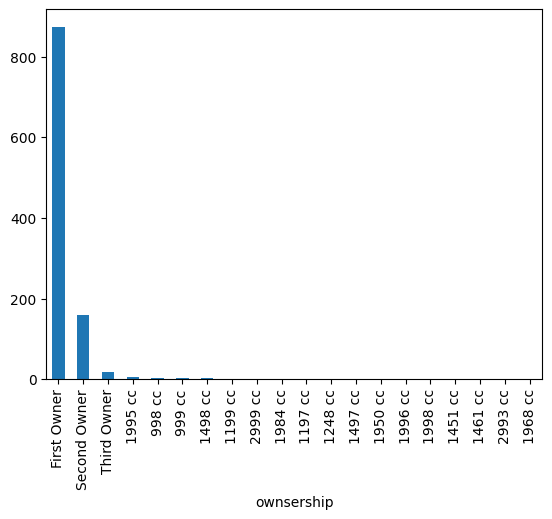

In [22]:
df_car.ownsership.value_counts().plot(kind='bar')

## observations:
There are many wrong entries in ownsership column.

In [23]:
df_car=df_car[df_car['ownsership'].isin(['First Owner','Second Owner','Third Owner'])]

<Axes: xlabel='ownsership'>

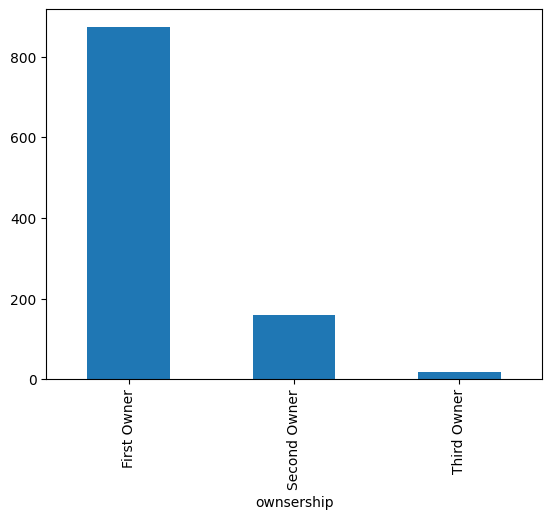

In [24]:
df_car.ownsership.value_counts().plot(kind='bar')

In [25]:
df_car.shape

(1052, 12)

<Axes: xlabel='transmission'>

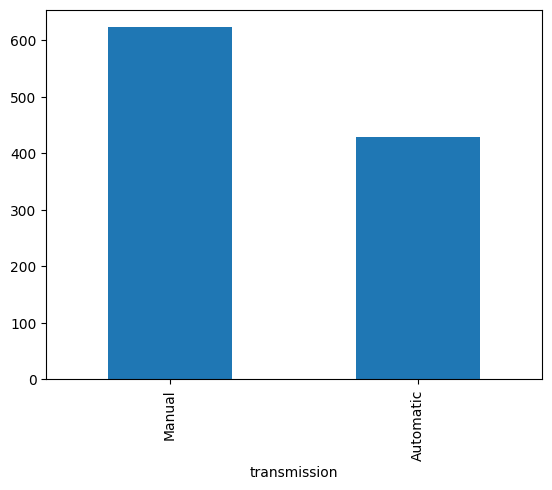

In [26]:
df_car.transmission.value_counts().plot(kind='bar')

## observations:
Most of the cars are Manual

<Axes: xlabel='manufacturing_year'>

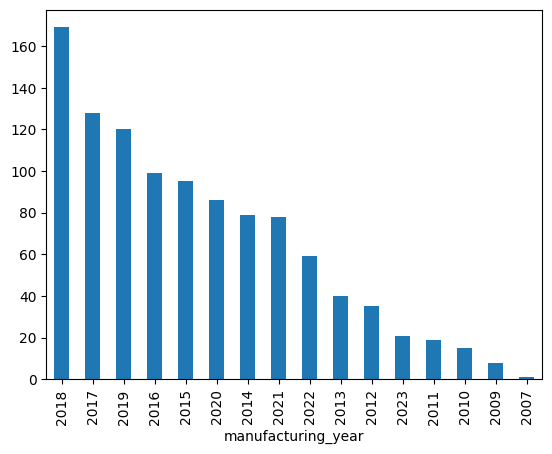

In [27]:
df_car.manufacturing_year.value_counts().plot(kind='bar')

<Axes: xlabel='seats'>

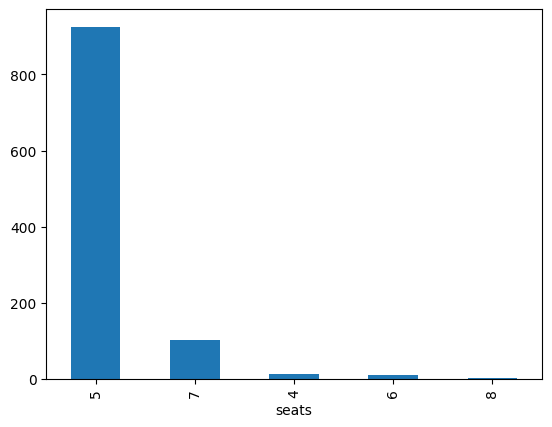

In [28]:
df_car.seats.value_counts().plot(kind='bar')

In [30]:
df_car.seats.value_counts()

seats
5    925
7    102
4     14
6      9
8      2
Name: count, dtype: int64

C:\Users\nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


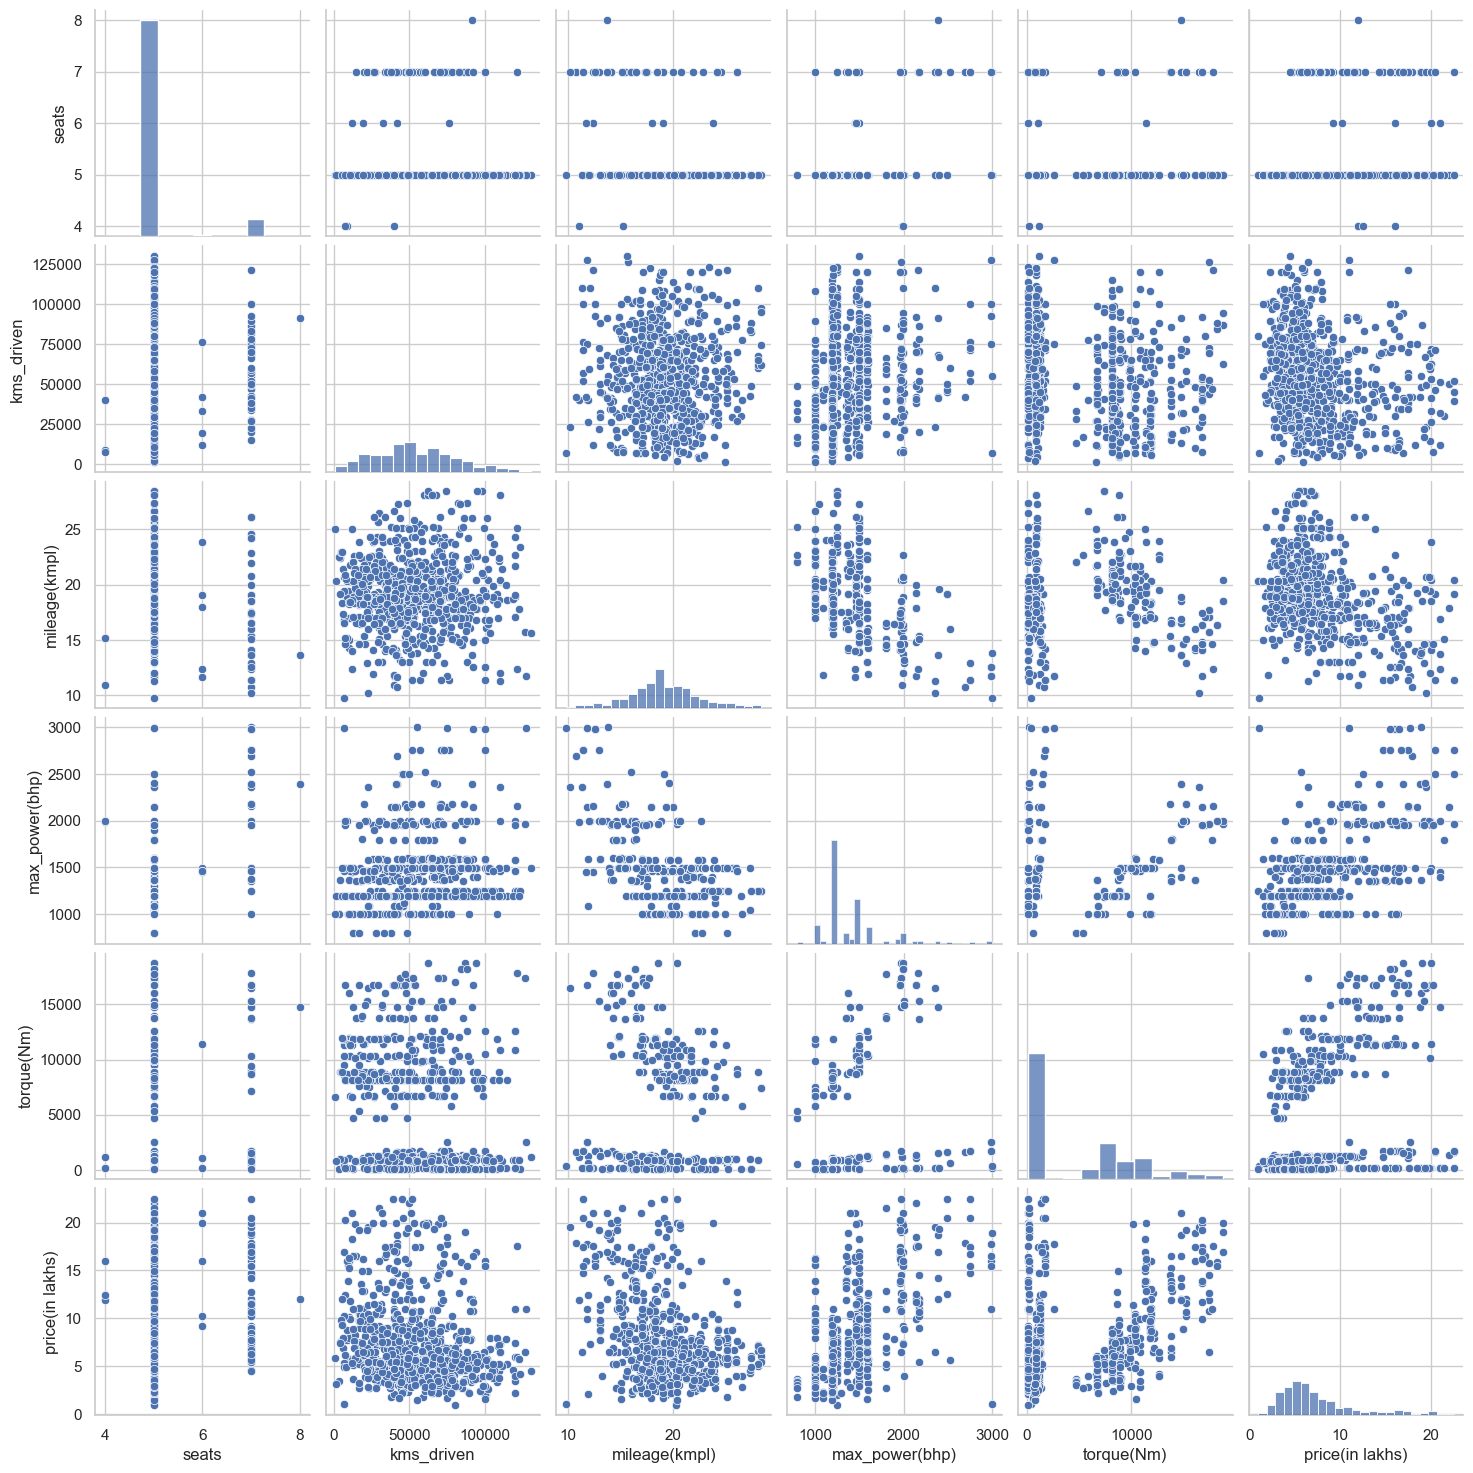

In [70]:
sns.pairplot(df_car)

## Outlier Detection

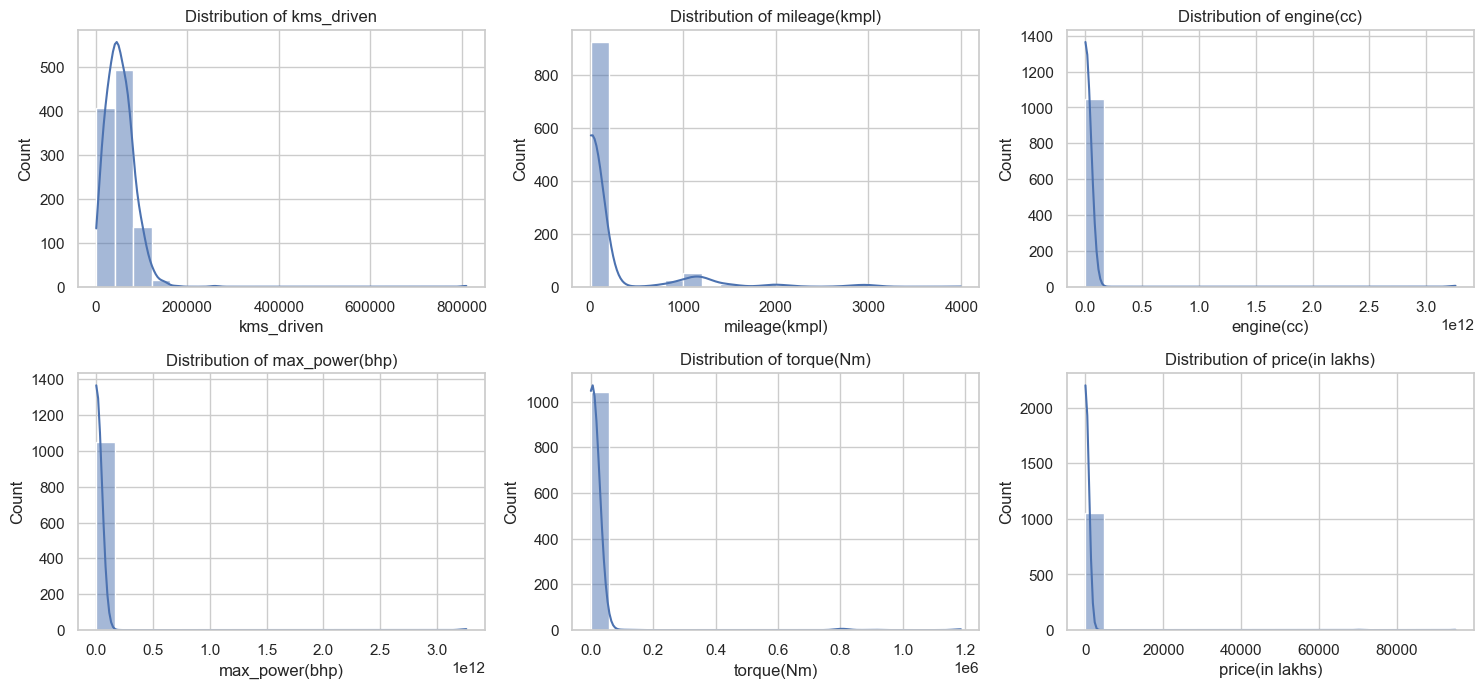

In [31]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of selected variables
plt.figure(figsize=(15, 10))
columns = ['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_car[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

## Checking for outliers using Box Plot

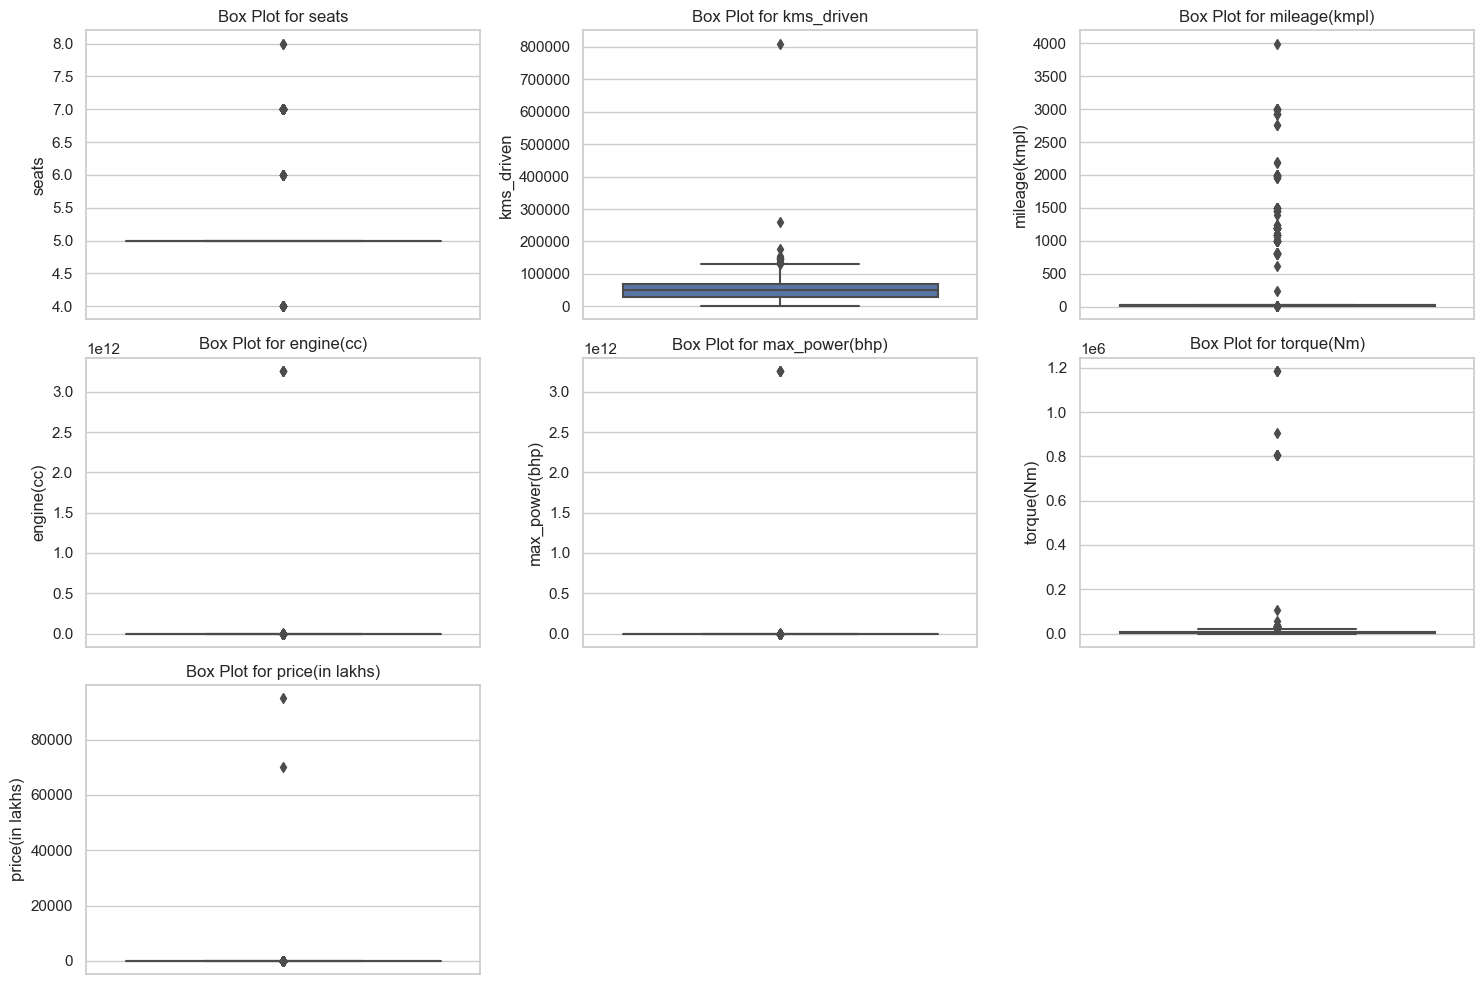

In [32]:
# checking for outliers

plt.figure(figsize=(15,10))
columns = ['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']

for i,column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=column, data=df_car)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

## Outlier Removal using Inter Quartile Range

In [33]:
def outlier_removal_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# identify columns for outlier removal
columns_iqr = ['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']

# remove outliers using above defined function
for column in columns_iqr:
    df_car = outlier_removal_iqr(df_car, column)

In [34]:
df_car.shape

(746, 12)

## Correlation matrix using heatmap

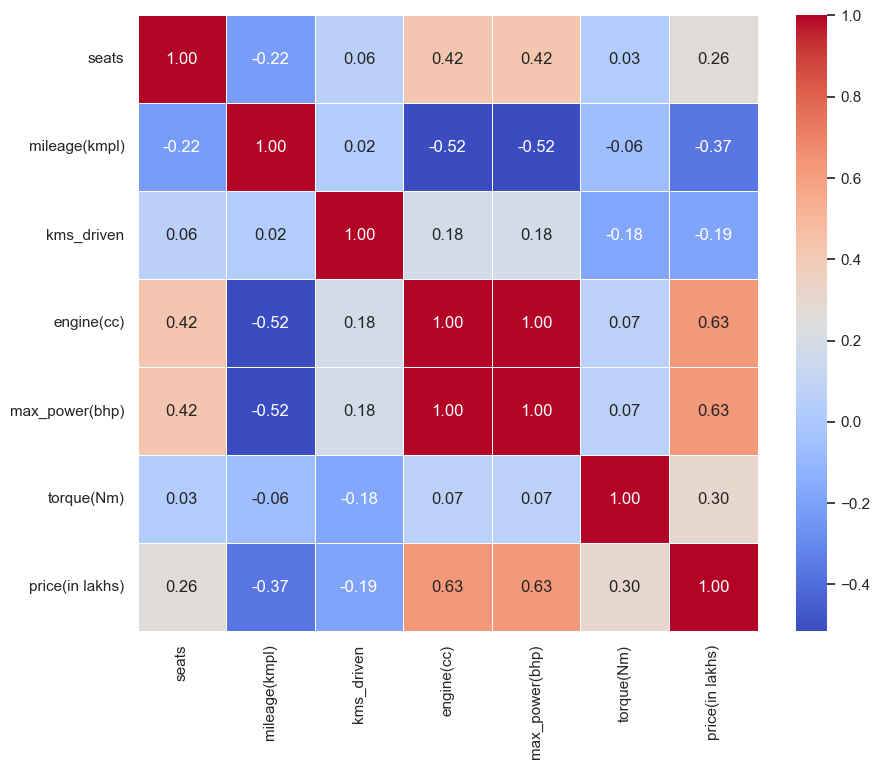

In [36]:
columns_for_heatmap = ['seats','mileage(kmpl)','kms_driven', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)','price(in lakhs)']

# Select the subset of data
subset_data = df_car[columns_for_heatmap]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

## observations:
1)From the above correlation matrix it is clear that,there is a strong positive correlation between engine(cc) and max_power(bhp). 2)So inorder to prevent multicollinearity,we need to include only one feature fro the above.




In [37]:
df_car.drop('engine(cc)',axis=1,inplace=True)

In [38]:
df_car.shape

(746, 11)

## Categorical Encoding Using OneHotEncoder

In [39]:
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = df_car.select_dtypes(include='object').columns

# Use OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' is set to 'first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df_car[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
df_car.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
# Concatenate the encoded DataFrame with the original DataFrame, dropping the columns to be encoded
df_encoded = pd.concat([df_car.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_encoded)

     seats  kms_driven  mileage(kmpl)  max_power(bhp)  torque(Nm)  \
0        5       30615          17.40           999.0      9863.0   
1        5       18378          16.50          1353.0     13808.0   
2        5       42000          18.70          1199.0       887.0   
3        5       36739          18.90          1197.0      8186.0   
4        5       76000          15.80          1591.0      1213.0   
..     ...         ...            ...             ...         ...   
741      5       19446          18.20          1199.0       887.0   
742      7       26500          26.11          1462.0      8663.0   
743      5       49000          17.50          1199.0       887.0   
744      5       40000          18.78           999.0        75.0   
745      5       34756          20.85          1197.0      8314.0   

     price(in lakhs)  insurance_validity_Third Party  \
0               8.99                             0.0   
1              13.56                             0.0   
2  

C:\Users\nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
data_new=df_encoded ## just copying our dataframe to a new dataframe.
data_new

,seats,kms_driven,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs),insurance_validity_Third Party,insurance_validity_Third Party insurance,fuel_type_Diesel,fuel_type_Petrol,...,manufacturing_year_2014,manufacturing_year_2015,manufacturing_year_2016,manufacturing_year_2017,manufacturing_year_2018,manufacturing_year_2019,manufacturing_year_2020,manufacturing_year_2021,manufacturing_year_2022,manufacturing_year_2023
0,5,30615,17.40,999.0,9863.0,8.99,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5,18378,16.50,1353.0,13808.0,13.56,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5,42000,18.70,1199.0,887.0,5.45,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,36739,18.90,1197.0,8186.0,5.12,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,76000,15.80,1591.0,1213.0,9.30,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,5,19446,18.20,1199.0,887.0,6.50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
742,7,26500,26.11,1462.0,8663.0,11.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
743,5,49000,17.50,1199.0,887.0,5.85,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
744,5,40000,18.78,999.0,75.0,4.75,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
data_new.columns

Index(['seats', 'kms_driven', 'mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)',
       'price(in lakhs)', 'insurance_validity_Third Party',
       'insurance_validity_Third Party insurance', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'ownsership_Second Owner', 'ownsership_Third Owner',
       'transmission_Manual', 'manufacturing_year_2009',
       'manufacturing_year_2010', 'manufacturing_year_2011',
       'manufacturing_year_2012', 'manufacturing_year_2013',
       'manufacturing_year_2014', 'manufacturing_year_2015',
       'manufacturing_year_2016', 'manufacturing_year_2017',
       'manufacturing_year_2018', 'manufacturing_year_2019',
       'manufacturing_year_2020', 'manufacturing_year_2021',
       'manufacturing_year_2022', 'manufacturing_year_2023'],
      dtype='object')

## Feature Scaling Using MinMaxScaler

In [44]:
scaler=MinMaxScaler()
data_new[['seats', 'kms_driven', 'mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)']]=scaler.fit_transform(data_new[['seats', 'kms_driven', 'mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)']])
## only done scaling to numerical variables ,since categorical encoding has done to categorical variables ,it is not necessary to feature scale them.

In [45]:
data_new

,seats,kms_driven,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs),insurance_validity_Third Party,insurance_validity_Third Party insurance,fuel_type_Diesel,fuel_type_Petrol,...,manufacturing_year_2014,manufacturing_year_2015,manufacturing_year_2016,manufacturing_year_2017,manufacturing_year_2018,manufacturing_year_2019,manufacturing_year_2020,manufacturing_year_2021,manufacturing_year_2022,manufacturing_year_2023
0,0.25,0.228204,0.408602,0.092147,0.523654,8.99,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.25,0.133174,0.360215,0.252837,0.734538,13.56,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.25,0.316616,0.478495,0.182932,0.043834,5.45,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.25,0.275761,0.489247,0.182025,0.434009,5.12,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.580651,0.322581,0.360872,0.061260,9.30,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.25,0.141468,0.451613,0.182932,0.043834,6.50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
742,0.75,0.196248,0.876882,0.302315,0.459507,11.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
743,0.25,0.370976,0.413978,0.182932,0.043834,5.85,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.25,0.301085,0.482796,0.092147,0.000428,4.75,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Splitting Data

In [61]:
from sklearn.model_selection import train_test_split
X = data_new.drop(['price(in lakhs)'], axis = 1)
Y = data_new['price(in lakhs)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [ ]:
##Building Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [63]:
Y_pred = model_LR.predict(X_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 4.3590490745912716


In [65]:
# Calculate R-squared score
r2 = r2_score(Y_test, Y_pred)

print(f'R-squared score: {r2}')


R-squared score: 0.7399664966870516


In [68]:
## Adjusted R-squared score
adjustedr2score=1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
adjustedr2score

0.6824180984128745